In [28]:
import re
import sys

import matplotlib.pyplot as plt
import networkx as nx

sys.path.append("..")
import aoc

PATT_LINE = re.compile(r"^(.+): (.+)$")

class Graph:
    def __init__(self, filename):
        self.memo = dict()
        self.edges = dict()
        for l in aoc.read_lines(filename):
            m = PATT_LINE.match(l)
            if m:
                k = m.group(1)
                vs = m.group(2).split()
                self.edges[k] = vs

    def graph(self):
        g = nx.DiGraph()
        for k, vs in self.edges.items():
            for v in vs:
                g.add_edge(k, v)
        return g

    def count_paths(self, source, dest):
        """ This is a simplified memoized counting implementation that assumes that
            self.graph is a DAG (which it is)"""

        if source == dest:
            return 1
        if source in self.memo:
            return self.memo[source]

        count = 0
        if self.edges[source] is not None:
            for child in self.edges[source]:
                count += self.count_paths(child, dest)

        self.memo[source] = count
        return count

test = Graph("test.txt")
test.edges

{'aaa': ['you', 'hhh'],
 'you': ['bbb', 'ccc'],
 'bbb': ['ddd', 'eee'],
 'ccc': ['ddd', 'eee', 'fff'],
 'ddd': ['ggg'],
 'eee': ['out'],
 'fff': ['out'],
 'ggg': ['out'],
 'hhh': ['ccc', 'fff', 'iii'],
 'iii': ['out']}

In [29]:
test.count_paths("you", "out")

5

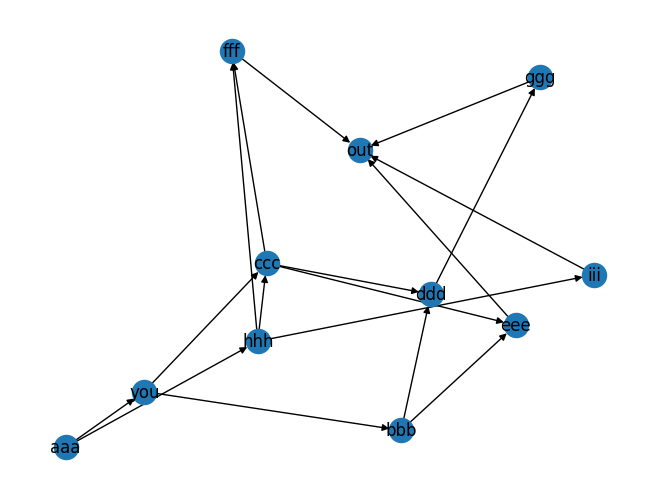

In [30]:
nx.draw(test.graph(), with_labels=True)

In [31]:
inp = Graph("input.txt")

In [32]:
inp.count_paths("you", "out")

786

In [27]:
inp.edges

{'wun': ['qqa', 'eed'],
 'szi': ['ydi'],
 'dur': ['kqy', 'glf'],
 'pyy': ['uoh', 'wie', 'hqk'],
 'nbt': ['oqe', 'qel', 'frx'],
 'ajl': ['hfl', 'otm', 'hjx'],
 'xft': ['rpn', 'zau', 'eil', 'zaq'],
 'uma': ['zqv', 'znv', 'fxa', 'oqa'],
 'znf': ['uqr'],
 'you': ['wpc',
  'ckx',
  'kuq',
  'rgd',
  'rzg',
  'sox',
  'awx',
  'abu',
  'bhd',
  'per',
  'zdq',
  'ywf',
  'nnk',
  'opn',
  'dur',
  'pfw'],
 'znv': ['vfl'],
 'xbw': ['tyc', 'gmw'],
 'jwz': ['pez', 'fwz', 'jzx'],
 'hda': ['tum', 'jdi', 'mqp', 'gzv'],
 'yna': ['cyj', 'lte', 'nbp', 'ygg'],
 'uot': ['yjf', 'vch'],
 'sds': ['wih',
  'wxr',
  'mbt',
  'vay',
  'mlt',
  'qyc',
  'teb',
  'wfz',
  'zgk',
  'hus',
  'nbt',
  'dte',
  'khq',
  'tfn',
  'hbk',
  'tgu',
  'eik',
  'wiu'],
 'wxy': ['oth', 'jgv', 'qzd'],
 'qox': ['hxh'],
 'mqx': ['uwk', 'gco', 'lua'],
 'otc': ['hda'],
 'tfn': ['tzx'],
 'sxd': ['epj'],
 'hxh': ['prq', 'cxm', 'tyv', 'gyo'],
 'gmw': ['kuq',
  'ckx',
  'wpc',
  'awx',
  'abu',
  'sox',
  'bkr',
  'odf',
  'rgd',